In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
book = pd.read_csv("Books.csv")
rat = pd.read_csv("Ratings.csv") 
user = pd.read_csv("Users.csv")

C:\Users\dipan\AppData\Local\Temp\ipykernel_3128\490005007.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  book = pd.read_csv("Books.csv")


In [3]:
print(book.shape,
rat.shape,
user.shape)

(271360, 8) (1149780, 3) (278858, 3)


In [4]:
print(book.isnull().sum(),'\n','\n',rat.isnull().sum(),'\n','\n',user.isnull().sum())

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64 
 
 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64 
 
 User-ID          0
Location         0
Age         110762
dtype: int64


In [5]:
print(book.duplicated().sum(),'\n','\n',rat.duplicated().sum(),'\n','\n',user.duplicated().sum())

0 
 
 0 
 
 0


In [6]:
print(book.columns,"\n",rat.columns,"\n",user.columns)

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object') 
 Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object') 
 Index(['User-ID', 'Location', 'Age'], dtype='object')


In [7]:
# plt.scatter(user['User-ID'],user['Location'])

In [8]:
len(user['Age'].unique().tolist())

166

In [9]:
user['Age'].value_counts()

Age
24.0     5687
25.0     5618
26.0     5547
23.0     5456
27.0     5383
         ... 
220.0       1
143.0       1
140.0       1
189.0       1
127.0       1
Name: count, Length: 165, dtype: int64

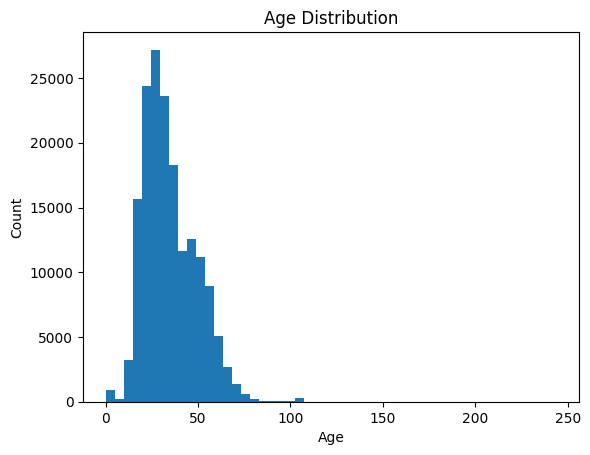

In [10]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(user['Age'], bins=50)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()


In [11]:
# plt.figure()
# plt.hist(rat['ISBN'], bins=50)
# plt.xlabel('ISBM')
# plt.ylabel('Count')
# plt.title('ISBM Distribution')
# plt.show()



KeyboardInterrupt



In [12]:
book.head(1)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...


In [13]:
rat.head(1)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0


In [14]:
rating_with_name = rat.merge(book,on='ISBN')

In [15]:
rating_with_name.head(1)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [16]:
rating_with_name.shape

(1031136, 10)

In [17]:
num_rating_df = rating_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)

In [18]:
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [23]:
avg_rating_df = rating_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_ratings'},inplace=True)
avg_rating_df
# avg_rating_df = (rating_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index())
# avg_rating_df.rename(columns={'Book-Rating': 'avg_ratings'}, inplace=True)
# avg_rating_df

,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667
